In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
LMuTaupaths = glob.glob('input/*')

In [3]:
ERs, g_x, m_A, spec=np.load('input/params_0/spectra_Ar.npy', allow_pickle=True)

In [4]:
spec[0]

array([1399873.63638292, 1398701.15762374, 1397525.97546852, ...,
             0.        ,       0.        ,       0.        ])

Plotting one of the results

Text(0, 0.5, '$\\rm{d}R/\\rm{d}E_R\\,\\,\\,\\left[\\rm{keV}^{-1}\\,\\,\\rm{ton}^{-1}\\,\\,\\rm{yr}^{-1}\\right]$')

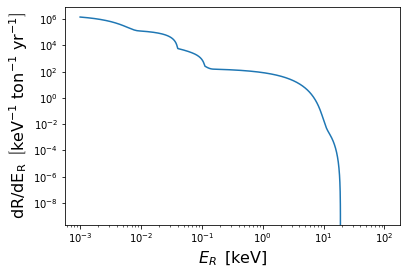

In [5]:
plt.loglog(ERs*1e6, spec[0]) # remember ERs is in GeV

plt.xlabel(r'$E_R\,\,\,\left[\rm{keV}\right]$', size=16)
plt.ylabel(r'$\rm{d}R/\rm{d}E_R\,\,\,\left[\rm{keV}^{-1}\,\,\rm{ton}^{-1}\,\,\rm{yr}^{-1}\right]$', size=16)

Putting is all in a pandas dataframe

In [16]:
df_MuTau = pd.DataFrame()

for p in LMuTaupaths:
    filepath = p + '/spectra_Ar.npy'
    ERs, g_x, m_A, spec=np.load(filepath, allow_pickle=True)
    for i in range(len(m_A)):
        temp_entry = {'ERs': ERs, 'g_x':g_x, 'm_A':m_A[i], 'spec':spec[i]}
        #print(temp_entry)
        df_MuTau = df_MuTau.append(temp_entry, ignore_index=True)

How to use pandas dataframes

In [18]:
df_MuTau

,ERs,g_x,m_A,spec
0,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.001399,1.000000,"[1399919.601348054, 1398747.0900356574, 139757..."
1,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.001399,0.932603,"[1399926.610670543, 1398754.0943828402, 139757..."
2,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.001399,0.869749,"[1399934.698915581, 1398762.1768831694, 139758..."
3,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.001399,0.811131,"[1399944.037068889, 1398771.5083993166, 139759..."
4,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.001399,0.756463,"[1399954.824751809, 1398782.2884086242, 139760..."
...,...,...,...,...
19995,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.001804,0.001322,"[439743444774.1393, 439294857757.8102, 4388453..."
19996,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.001804,0.001233,"[574257954819.0801, 573656716571.3054, 5730543..."
19997,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.001804,0.001150,"[748620190400.1936, 747813569808.7352, 7470054..."
19998,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.001804,0.001072,"[974006744804.0845, 972923634453.5034, 9718385..."


Pick $g_x$ of a given value

In [25]:
df_MuTau[df_MuTau['g_x']==0.01]

,ERs,g_x,m_A,spec
7100,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.01,1.000000,"[1403585.435021477, 1402410.160488815, 1401232..."
7101,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.01,0.932603,"[1404378.5335348942, 1403202.642971058, 140202..."
7102,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.01,0.869749,"[1405366.767152499, 1404190.1047771163, 140301..."
7103,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.01,0.811131,"[1406603.943122605, 1405426.3093746544, 140424..."
7104,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.01,0.756463,"[1408159.8414317276, 1406980.979828909, 140579..."
...,...,...,...,...
7195,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.01,0.001322,"[414981806016165.3, 414558470025974.25, 414134..."
7196,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.01,0.001233,"[541928516053647.2, 541361115775289.44, 540792..."
7197,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.01,0.001150,"[706481992032543.4, 705720761723219.5, 7049581..."
7198,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.01,0.001072,"[919190396806771.4, 918168227682254.1, 9171442..."


Or two values 

In [32]:
df_MuTau[(df_MuTau['g_x']==0.01) & (df_MuTau['m_A']==1.0)]

,ERs,g_x,m_A,spec
7100,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.01,1.0,"[1403585.435021477, 1402410.160488815, 1401232..."


Read the spectrum 

In [33]:
df_MuTau[(df_MuTau['g_x']==0.01) & (df_MuTau['m_A']==1.0)]['spec']

7100    [1403585.435021477, 1402410.160488815, 1401232...
Name: spec, dtype: object

In [46]:
df_MuTau[(df_MuTau['g_x']==0.01) & (df_MuTau['m_A']==1.0)]['ERs'].values[0]

array([1.00000000e-09, 1.00230570e-09, 1.00461672e-09, ...,
       9.95404500e-05, 9.97699604e-05, 1.00000000e-04])

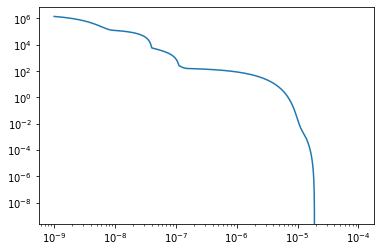

In [47]:
plt.loglog(df_MuTau[(df_MuTau['g_x']==0.01) & (df_MuTau['m_A']==1.0)]['ERs'].values[0],
           df_MuTau[(df_MuTau['g_x']==0.01) & (df_MuTau['m_A']==1.0)]['spec'].values[0])
